NLP can be used for classifcation and text generation and sequnce to sequnce to trasaltion and also voice assitance.

NLP inputs and outputs
the etsxt we input should be tokenised or embedded which is known as numercical encoding. so our input shape woulde  be (batch size, embedding size ) where these tow can change according to the potbelms we have in hand , the machine learing algorithm that you can use can be CNN\RNN\featrure ecxtraction etc.



The typical Architecture of RNN ,that is recurring neural network
####What is RNN?
it is a feed forwrad networks,which deals with sequentail data

hyperparameter

imput :can be text
input layer :takes in trageted sequnce

Text vectorization layer : Maps input sequence into numbers

Embedding : truns this vectors into  (mapping learns related word)

RNN: Find pattern in the sequnce

hidden activation : Add non linerity to learn the features

pooling layers reduce dimentionality for only convolution layers

fully connected layers :further refines learned features from recurrent layers

Output layers

output activation



Checking for GPU

In [1]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-77452d0e-6ea7-722c-4d90-4c1e9bb1528c)


In [2]:
# Download helper functions script
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2023-12-26 08:20:49--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-12-26 08:20:49 (94.6 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [3]:
# helper function

from  helper_functions import unzip_data,create_tensorboard_callback,plot_loss_curves, compare_historys

Introduction to NLP data

In [4]:
#get the text data

# Download data (same as from Kaggle)
!wget "https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip"

--2023-12-26 08:20:54--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.212.207, 142.251.162.207, 173.194.213.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.212.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip’

nlp_getting_started 100%[===================>] 593.11K  --.-KB/s    in 0.008s  

2023-12-26 08:20:55 (73.0 MB/s) - ‘nlp_getting_started.zip’ saved [607343/607343]



In [5]:
# Unzip data
unzip_data("nlp_getting_started.zip")

train.csv - training samples of real and not real diaster Tweets.
test.csv - testing samples of real and not real diaster Tweets

Where,

1 = a real disaster Tweet

0 = not a real disaster Tweet

In [6]:
# Turn .csv files into pandas DataFrame's
import pandas as pd
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [7]:
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [8]:
train_df_shuffled = train_df.sample(frac=1, random_state=42) # shuffle with random_state=42 for reproducibility
train_df_shuffled.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


we can visulize the dta ans see how the training data has a columns known as target column which represent 0 and 1.

In [9]:
numpy_text =train_df_shuffled["text"].to_numpy()

In [10]:
numpy_text

array(['So you have a new weapon that can cause un-imaginable destruction.',
       'The f$&amp;@ing things I do for #GISHWHES Just got soaked in a deluge going for pads and tampons. Thx @mishacollins @/@',
       'DT @georgegalloway: RT @Galloway4Mayor: \x89ÛÏThe CoL police can catch a pickpocket in Liverpool Stree... http://t.co/vXIn1gOq4Q',
       ...,
       'Omron HEM-712C Automatic Blood Pressure Monitor STANDARD AND LARGE BP CUFFS http://t.co/gJBAInQWN9 http://t.co/jPhgpL1c5x',
       'Officials say a quarantine is in place at an Alabama home over a possible Ebola case after developing symptoms... http://t.co/rqKK15uhEY',
       'I moved to England five years ago today. What a whirlwind of time it has been! http://t.co/eaSlGeA1B7'],
      dtype=object)

In [11]:

from sklearn.model_selection import train_test_split
train_sentences, val_sentences, train_labels, val_labels = train_test_split(train_df_shuffled["text"].to_numpy(),
                                                                            train_df_shuffled["target"].to_numpy(),
                                                                            test_size=0.1, # dedicate 10% of samples to validation set
                                                                            random_state=42)

In [12]:
train_sentences[:10]

array(['@mogacola @zamtriossu i screamed after hitting tweet',
       'Imagine getting flattened by Kurt Zouma',
       '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
       "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
       'Somehow find you and I collide http://t.co/Ee8RpOahPk',
       '@EvaHanderek @MarleyKnysh great times until the bus driver held us hostage in the mall parking lot lmfao',
       'destroy the free fandom honestly',
       'Weapons stolen from National Guard Armory in New Albany still missing #Gunsense http://t.co/lKNU8902JE',
       '@wfaaweather Pete when will the heat wave pass? Is it really going to be mid month? Frisco Boy Scouts have a canoe trip in Okla.',
       'Patient-reported outcomes in long-term survivors of metastatic colorectal cancer - British Journal of Surgery http://t.co/5Yl4DC1Tqt'],
      dtype=object)

In NLP, there are two main concepts for turning text into numbers:

Tokenization - A straight mapping from word or character or sub-word to a numerical value. There are three main levels of tokenization:
Using word-level tokenization with the sentence "I love TensorFlow" might result in "I" being 0, "love" being 1 and "TensorFlow" being 2. In this case, every word in a sequence considered a single token.
Character-level tokenization, such as converting the letters A-Z to values 1-26. In this case, every character in a sequence considered a single token.
Sub-word tokenization is in between word-level and character-level tokenization. It involves breaking invidual words into smaller parts and then converting those smaller parts into numbers. For example, "my favourite food is pineapple pizza" might become "my, fav, avour, rite, fo, oo, od, is, pin, ine, app, le, piz, za". After doing this, these sub-words would then be mapped to a numerical value. In this case, every word could be considered multiple tokens

Embeddings - An embedding is a representation of natural language which can be learned. Representation comes in the form of a feature vector. For example, the word "dance" could be represented by the 5-dimensional vector [-0.8547, 0.4559, -0.3332, 0.9877, 0.1112]. It's important to note here, the size of the feature vector is tuneable. There are two ways to use embeddings:
Create your own embedding - Once your text has been turned into numbers (required for an embedding), you can put them through an embedding layer (such as tf.keras.layers.Embedding) and an embedding representation will be learned during model training.
Reuse a pre-learned embedding - Many pre-trained embeddings exist online. These pre-trained embeddings have often been learned on large corpuses of text (such as all of Wikipedia) and thus have a good underlying representation of natural language. You can use a pre-trained embedding to initialize your model and fine-tune it to your own specific task.

#tokensiation

In [13]:
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization # after TensorFlow 2.6

In [14]:
text_vectorizer = TextVectorization(max_tokens=None, # how many words in the vocabulary (all of the different words in your text)
                                    standardize="lower_and_strip_punctuation", # how to process text
                                    split="whitespace", # how to split tokens
                                    ngrams=None, # create groups of n-words?
                                    output_mode="int", # how to map tokens to numbers
                                    output_sequence_length=None) # how long should the output sequence of tokens be?
                                    #pad_to_max_tokens=True)

n particular, let's set values for max_tokens and output_sequence_length.

For max_tokens (the number of words in the vocabulary), multiples of 10,000 (10,000, 20,000, 30,000) or the exact number of unique words in your text (e.g. 32,179) are common values.

For our use case, we'll use 10,000.

And for the output_sequence_length we'll use the average number of tokens per Tweet in the training set. But first, we'll need to find it.

In [15]:

# Find average number of tokens (words) in training Tweets
round(sum([len(i.split()) for i in train_sentences])/len(train_sentences))


15

In [16]:
# Setup text vectorization with custom variables
max_vocab_length = 10000 # max number of words to have in our vocabulary
max_length = 15 # max length our sequences will be (e.g. how many words from a Tweet does our model see?)

text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                    output_mode="int",
                                    output_sequence_length=max_length)

In [17]:

# Fit the text vectorizer to the training text
text_vectorizer.adapt(train_sentences)

In [18]:

# Create sample sentence and tokenize it
sample_sentence = "there is a earthquake"
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[ 74,   9,   3, 290,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0]])>

In [19]:
import random
random_sent = random.choice(train_sentences)
print(random_sent)
text_vectorizer([random_sent])

Ashes 2015: AustraliaÛªs collapse at Trent Bridge among worst in history: England bundled out Australia for 60 ... http://t.co/985DwWPdEt


<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[1325,  208, 6159,  155,   17, 1349,  489, 1558,  971,    4,  705,
        2126,    1,   36, 1224]])>

In [20]:
words_vocab = text_vectorizer.get_vocabulary()
top_5_vocab = words_vocab[:5]
print(top_5_vocab)

['', '[UNK]', 'the', 'a', 'in']


#Embedding

In [21]:
tf.random.set_seed(42)
from tensorflow.keras import layers

embedding = layers.Embedding(input_dim=max_vocab_length, # set input shape
                             output_dim=128, # set size of embedding vector
                             #embeddings_initializer="uniform", # default, intialize randomly
                             input_length=max_length, # how long is each input
                             #name="embedding_1"
                             )

embedding

In [22]:
embedding(text_vectorizer(['there is a earthquake']))

<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[-0.02453041,  0.02191049,  0.00306214, ...,  0.03204859,
          0.00500698,  0.00724546],
        [ 0.02564554, -0.00352542, -0.04878749, ..., -0.02575202,
         -0.01509625,  0.03494214],
        [-0.03075789,  0.0081869 , -0.00553706, ..., -0.03369044,
         -0.04832051, -0.00352212],
        ...,
        [-0.04100312,  0.01108671, -0.03189156, ..., -0.03901031,
          0.04017689, -0.03694425],
        [-0.04100312,  0.01108671, -0.03189156, ..., -0.03901031,
          0.04017689, -0.03694425],
        [-0.04100312,  0.01108671, -0.03189156, ..., -0.03901031,
          0.04017689, -0.03694425]]], dtype=float32)>

In [23]:
random_sent = random.choice(train_sentences)
print(random_sent)
embedding(text_vectorizer([random_sent]))

Don't think for one second I'm out to drown your memory. Baby you ain't worth the whiskey.


<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[-0.04386724, -0.01215453,  0.0030838 , ...,  0.00912336,
         -0.00557156,  0.00104163],
        [ 0.0499667 , -0.03749908, -0.02828642, ..., -0.02216365,
         -0.02000139, -0.04325248],
        [ 0.01795426,  0.00901722,  0.00674301, ...,  0.03892971,
          0.00417887, -0.00884079],
        ...,
        [ 0.04848739, -0.02691901, -0.02182909, ...,  0.03830692,
         -0.03876137,  0.03215725],
        [-0.0483659 , -0.02057854,  0.01747202, ...,  0.02754929,
          0.0151041 , -0.0002513 ],
        [-0.0279596 , -0.02299941, -0.01714683, ...,  0.00445123,
         -0.03322349, -0.04685856]]], dtype=float32)>

#Creating a Model
To get plenty of practice, we're going to build a series of different models, each as its own experiment. We'll then compare the results of each model and see which one performed best.

More specifically, we'll be building the following:

Model 0: Naive Bayes (baseline)

Model 1: Feed-forward neural network (dense model)

Model 2: LSTM model

Model 3: GRU model

Model 4: Bidirectional-LSTM model

Model 5: 1D Convolutional Neural Network

Model 6: TensorFlow Hub Pretrained Feature Extractor

Model 7: Same as model 6 with 10% of training data

Model 0 is the simplest to acquire a baseline which we'll expect each other of the other deeper models to beat.

Each experiment will go through the following steps:

Construct the model
Train the model
Make predictions with the model
Track prediction evaluation metrics for later comparison



---



To create our baseline, we'll create a Scikit-Learn Pipeline using the TF-IDF (term frequency-inverse document frequency) formula to convert our words to numbers and then model them with the Multinomial Naive Bayes algorithm

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

# Create tokenization and modelling pipeline
model_0 = Pipeline([
                    ("tfidf", TfidfVectorizer()), # convert words to numbers using tfidf
                    ("clf", MultinomialNB()) # model the text
])

# Fit the pipeline to the training data
model_0.fit(train_sentences, train_labels)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

#Evalution function

In [25]:
# Function to evaluate: accuracy, precision, recall, f1-score
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
  """
  Calculates model accuracy, precision, recall and f1 score of a binary classification model.

  Args:
  -----
  y_true = true labels in the form of a 1D array
  y_pred = predicted labels in the form of a 1D array

  Returns a dictionary of accuracy, precision, recall, f1-score.
  """
  # Calculate model accuracy
  model_accuracy = accuracy_score(y_true, y_pred) * 100
  # Calculate model precision, recall and f1 score using "weighted" average
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
  model_results = {"accuracy": model_accuracy,
                  "precision": model_precision*100,
                  "recall": model_recall*100,
                  "f1": model_f1*100}
  return model_results

In [26]:
baseline_preds = model_0.predict(val_sentences)

In [27]:
# Get baseline results
baseline_results = calculate_results(y_true=val_labels,
                                     y_pred=baseline_preds)
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 81.11390004213173,
 'recall': 79.26509186351706,
 'f1': 78.6218975804955}

##Model 1 :Simple dense model
Feed forward NN (dense model)

since we're going to be building a number of TensorFlow deep learning models, we'll import our create_tensorboard_callback() function from helper_functions.py to keep track of the results of each.

In [28]:
# Create tensorboard callback (need to create a new one for each model)
from helper_functions import create_tensorboard_callback

# Create directory to save TensorBoard logs
SAVE_DIR = "model_logs"

In [29]:
# Build model with the Functional API
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype="string") # inputs are 1-dimensional strings
x = text_vectorizer(inputs) # turn the input text into numbers
x = embedding(x) # create an embedding of the numerized numbers

outputs = layers.Dense(1, activation="sigmoid")(x) # create the output layer, want binary outputs so use sigmoid activation
model_1 = tf.keras.Model(inputs, outputs, name="model_1_dense")

In [30]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 dense (Dense)               (None, 15, 1)             129       
                                                                 
Total params: 1280129 (4.88 MB)
Trainable params: 1280129 (4.88 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


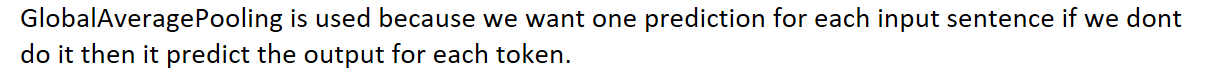

In [31]:
# Build model with the Functional API
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype="string") # inputs are 1-dimensional strings
x = text_vectorizer(inputs) # turn the input text into numbers
x = embedding(x) # create an embedding of the numerized numbers
x = layers.GlobalAveragePooling1D()(x) # lower the dimensionality of the embedding (try running the model without this layer and see what happens)
outputs = layers.Dense(1, activation="sigmoid")(x) # create the output layer, want binary outputs so use sigmoid activation
model_1 = tf.keras.Model(inputs, outputs, name="model_1_dense") # construct the model


In [32]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (  (None, 128)               0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1280129 (4.88 MB)
Trainable params: 128

In [33]:
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [34]:
model_1_history = model_1.fit(train_sentences, # input sentences can be a list of strings due to text preprocessing layer built-in model
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,
                                                                     experiment_name="simple_dense_model_1")])


Saving TensorBoard log files to: model_logs/simple_dense_model_1/20231226-082100
Epoch 1/5
215/215 [==============================] - 19s 67ms/step - loss: 0.6104 - accuracy: 0.6904 - val_loss: 0.5367 - val_accuracy: 0.7572
Epoch 2/5
215/215 [==============================] - 3s 16ms/step - loss: 0.4420 - accuracy: 0.8190 - val_loss: 0.4690 - val_accuracy: 0.7861
Epoch 3/5
215/215 [==============================] - 3s 15ms/step - loss: 0.3469 - accuracy: 0.8606 - val_loss: 0.4587 - val_accuracy: 0.7900
Epoch 4/5
215/215 [==============================] - 4s 17ms/step - loss: 0.2854 - accuracy: 0.8917 - val_loss: 0.4637 - val_accuracy: 0.7913
Epoch 5/5
215/215 [==============================] - 3s 14ms/step - loss: 0.2385 - accuracy: 0.9118 - val_loss: 0.4762 - val_accuracy: 0.7861


In [35]:

# Check the results
model_1.evaluate(val_sentences, val_labels)

24/24 [==============================] - 0s 3ms/step - loss: 0.4762 - accuracy: 0.7861


[0.4761740267276764, 0.7860892415046692]

In [36]:
#predict
model_1_pred_prob = model_1.predict(val_sentences)
print(model_1_pred_prob.shape)
print(model_1_pred_prob[0])

24/24 [==============================] - 0s 2ms/step
(762, 1)
[0.4105712]


Above we can see  after using pooling layer it has reduced to single predcition

and also now our predcition are in float values and the lables are either 0 or 1 so we have to convert this as well

In [37]:
model_1_preds = tf.squeeze(tf.round(model_1_pred_prob))

In [38]:
#evaluate
model_1_results = calculate_results(y_true=val_labels,
                                    y_pred=model_1_preds)
model_1_results

{'accuracy': 78.60892388451444,
 'precision': 79.03277546022673,
 'recall': 78.60892388451444,
 'f1': 78.32971347503846}

In [39]:
def compare_baseline_to_new_results(baseline_results, new_model_results):
  for key, value in baseline_results.items():
    print(f"Baseline {key}: {value:.2f}, New {key}: {new_model_results[key]:.2f}, Difference: {new_model_results[key]-value:.2f}")


In [40]:
compare_baseline_to_new_results(baseline_results=baseline_results,
                                new_model_results=model_1_results)

Baseline accuracy: 79.27, New accuracy: 78.61, Difference: -0.66
Baseline precision: 81.11, New precision: 79.03, Difference: -2.08
Baseline recall: 79.27, New recall: 78.61, Difference: -0.66
Baseline f1: 78.62, New f1: 78.33, Difference: -0.29


###Visulise the embedding layer


In [41]:
words_in_vocab = text_vectorizer.get_vocabulary()
len(words_in_vocab), words_in_vocab[:10]

(10000, ['', '[UNK]', 'the', 'a', 'in', 'to', 'of', 'and', 'i', 'is'])

In [42]:
embed_weights = model_1.get_layer("embedding").get_weights()[0]

https://www.tensorflow.org/text/guide/word_embeddings

In [43]:
'''import io
out_v = io.open('vectors.tsv', 'w', encoding='utf-8')
out_m = io.open('metadata.tsv', 'w', encoding='utf-8')

for index, word in enumerate(words_in_vocab):
  if index == 0:
    continue  # skip 0, it's padding.
  vec = embed_weights[index]
  out_v.write('\t'.join([str(x) for x in vec]) + "\n")
  out_m.write(word + "\n")
out_v.close()
out_m.close()'''

'import io\nout_v = io.open(\'vectors.tsv\', \'w\', encoding=\'utf-8\')\nout_m = io.open(\'metadata.tsv\', \'w\', encoding=\'utf-8\')\n\nfor index, word in enumerate(words_in_vocab):\n  if index == 0:\n    continue  # skip 0, it\'s padding.\n  vec = embed_weights[index]\n  out_v.write(\'\t\'.join([str(x) for x in vec]) + "\n")\n  out_m.write(word + "\n")\nout_v.close()\nout_m.close()'

In [44]:
'''try:
  from google.colab import files
  files.download('vectors.tsv')
  files.download('metadata.tsv')
except Exception:
  pass'''

"try:\n  from google.colab import files\n  files.download('vectors.tsv')\n  files.download('metadata.tsv')\nexcept Exception:\n  pass"

#RNN (Recurrent neural networks)

Recurrent neural networks can be used for a number of sequence-based problems:

One to one: one input, one output, such as image classification.
One to many: one input, many outputs, such as image captioning (image input, a sequence of text as caption output).
Many to one: many inputs, one outputs, such as text classification (classifying a Tweet as real diaster or not real diaster).
Many to many: many inputs, many outputs, such as machine translation (translating English to Spanish) or speech to text (audio wave as input, text as output).

##LSTM RNN



In [45]:
# Create LSTM model
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
print(x.shape)
x = layers.LSTM(64, return_sequences=True)(x)# return vector for each word in the Tweet (you can stack RNN cells as long as return_sequences=True)
print(x.shape)
x = layers.LSTM(64)(x) # return vector for whole sequence
print(x.shape)
x = layers.Dense(64, activation="relu")(x) # optional dense layer on top of output of LSTM cell
outputs = layers.Dense(1, activation="sigmoid")(x)
model_2 = tf.keras.Model(inputs, outputs, name="model_2_LSTM")

(None, 15, 128)
(None, 15, 64)
(None, 64)


 Many of these have been tuned to make sure they compute as fast as possible. The main ones you'll be looking to adjust are units (number of hidden units) and return_sequences (set this to True when stacking LSTM or other recurrent layers).


  return_sequences returns  3 dim

In [46]:
# Create LSTM model
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
print(x.shape)
#x = layers.LSTM(64, return_sequences=True)(x) # return vector for each word in the Tweet (you can stack RNN cells as long as return_sequences=True)
x = layers.LSTM(64)(x) # return vector for whole sequence
print(x.shape)
# x = layers.Dense(64, activation="relu")(x) # optional dense layer on top of output of LSTM cell
outputs = layers.Dense(1, activation="sigmoid")(x)
model_2 = tf.keras.Model(inputs, outputs, name="model_2_LSTM")

(None, 15, 128)
(None, 64)


In [47]:
model_2.summary()

Model: "model_2_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1329473 (5.07 MB)
Trainable params: 1329473 (5.07 MB)
Non-trainable params: 0 (0.00 Byte)
________________

In [48]:
# Compile model
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [49]:

# Fit model
model_2_history = model_2.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "LSTM")])

Saving TensorBoard log files to: model_logs/LSTM/20231226-082144
Epoch 1/5
215/215 [==============================] - 10s 36ms/step - loss: 0.2232 - accuracy: 0.9200 - val_loss: 0.5367 - val_accuracy: 0.7769
Epoch 2/5
215/215 [==============================] - 2s 10ms/step - loss: 0.1623 - accuracy: 0.9418 - val_loss: 0.6031 - val_accuracy: 0.7782
Epoch 3/5
215/215 [==============================] - 2s 10ms/step - loss: 0.1285 - accuracy: 0.9520 - val_loss: 0.7299 - val_accuracy: 0.7795
Epoch 4/5
215/215 [==============================] - 2s 8ms/step - loss: 0.1078 - accuracy: 0.9602 - val_loss: 0.8163 - val_accuracy: 0.7861
Epoch 5/5
215/215 [==============================] - 2s 9ms/step - loss: 0.0848 - accuracy: 0.9657 - val_loss: 0.9242 - val_accuracy: 0.7795


In [50]:
# Make predictions on the validation dataset
model_2_pred_probs = model_2.predict(val_sentences)
model_2_preds = tf.squeeze(tf.round(model_2_pred_probs))

24/24 [==============================] - 0s 3ms/step


In [51]:
# Calculate LSTM model results
model_2_results = calculate_results(y_true=val_labels,
                                    y_pred=model_2_preds)
model_2_results

{'accuracy': 77.95275590551181,
 'precision': 78.22644211580037,
 'recall': 77.95275590551181,
 'f1': 77.7140456257197}

In [52]:
compare_baseline_to_new_results(baseline_results, model_2_results)

Baseline accuracy: 79.27, New accuracy: 77.95, Difference: -1.31
Baseline precision: 81.11, New precision: 78.23, Difference: -2.89
Baseline recall: 79.27, New recall: 77.95, Difference: -1.31
Baseline f1: 78.62, New f1: 77.71, Difference: -0.91


Maybe incresing recurrent layers it can increase the accuracy as basline is still better than NN models

In [53]:
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
print(x.shape)
x = layers.LSTM(64, return_sequences=True)(x) # return vector for each word in the Tweet (you can stack RNN cells as long as return_sequences=True)
x = layers.LSTM(64)(x) # return vector for whole sequence
print(x.shape)
x = layers.Dense(64, activation="relu")(x) # optional dense layer on top of output of LSTM cell
outputs = layers.Dense(1, activation="sigmoid")(x)
model_2 = tf.keras.Model(inputs, outputs, name="model_2_LSTM")

(None, 15, 128)
(None, 64)


In [54]:
# Compile model
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [55]:
# Fit model
model_2_history = model_2.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "LSTM")])

Saving TensorBoard log files to: model_logs/LSTM/20231226-082208
Epoch 1/5
215/215 [==============================] - 13s 41ms/step - loss: 0.1410 - accuracy: 0.9530 - val_loss: 0.7591 - val_accuracy: 0.7782
Epoch 2/5
215/215 [==============================] - 3s 12ms/step - loss: 0.0760 - accuracy: 0.9714 - val_loss: 1.1676 - val_accuracy: 0.7808
Epoch 3/5
215/215 [==============================] - 3s 12ms/step - loss: 0.0593 - accuracy: 0.9747 - val_loss: 1.5097 - val_accuracy: 0.7690
Epoch 4/5
215/215 [==============================] - 2s 10ms/step - loss: 0.0536 - accuracy: 0.9775 - val_loss: 1.2870 - val_accuracy: 0.7835
Epoch 5/5
215/215 [==============================] - 2s 11ms/step - loss: 0.0492 - accuracy: 0.9778 - val_loss: 1.4321 - val_accuracy: 0.7782


In [56]:
# Make predictions on the validation dataset
model_2_pred_probs = model_2.predict(val_sentences)
model_2_preds = tf.squeeze(tf.round(model_2_pred_probs))

24/24 [==============================] - 1s 3ms/step


In [57]:
# Calculate LSTM model results
model_2_results = calculate_results(y_true=val_labels,
                                    y_pred=model_2_preds)
model_2_results

{'accuracy': 77.82152230971128,
 'precision': 78.33771178803303,
 'recall': 77.82152230971128,
 'f1': 77.48637513129987}

In [58]:
compare_baseline_to_new_results(baseline_results, model_2_results)

Baseline accuracy: 79.27, New accuracy: 77.82, Difference: -1.44
Baseline precision: 81.11, New precision: 78.34, Difference: -2.78
Baseline recall: 79.27, New recall: 77.82, Difference: -1.44
Baseline f1: 78.62, New f1: 77.49, Difference: -1.14


##GRU RNN ( gated recurrent uni)


In [59]:
# Build an RNN using the GRU cell
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
# x = layers.GRU(64, return_sequences=True) # stacking recurrent cells requires return_sequences=True
x = layers.GRU(64)(x)
# x = layers.Dense(64, activation="relu")(x) # optional dense layer after GRU cell
outputs = layers.Dense(1, activation="sigmoid")(x)
model_3 = tf.keras.Model(inputs, outputs, name="model_3_GRU")

In [60]:
model_3.summary()

Model: "model_3_GRU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 gru (GRU)                   (None, 64)                37248     
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1317313 (5.03 MB)
Trainable params: 1317313 (5.03 MB)
Non-trainable params: 0 (0.00 Byte)
_________________

In [61]:
# Compile GRU model
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [62]:
# Fit model
model_3_history = model_3.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, "GRU")])

Saving TensorBoard log files to: model_logs/GRU/20231226-082232
Epoch 1/5
215/215 [==============================] - 13s 45ms/step - loss: 0.1422 - accuracy: 0.9466 - val_loss: 0.6877 - val_accuracy: 0.7743
Epoch 2/5
215/215 [==============================] - 2s 10ms/step - loss: 0.0710 - accuracy: 0.9759 - val_loss: 0.8874 - val_accuracy: 0.7782
Epoch 3/5
215/215 [==============================] - 2s 10ms/step - loss: 0.0530 - accuracy: 0.9781 - val_loss: 1.2414 - val_accuracy: 0.7690
Epoch 4/5
215/215 [==============================] - 2s 8ms/step - loss: 0.0459 - accuracy: 0.9793 - val_loss: 1.1842 - val_accuracy: 0.7717
Epoch 5/5
215/215 [==============================] - 2s 8ms/step - loss: 0.0424 - accuracy: 0.9797 - val_loss: 1.5004 - val_accuracy: 0.7717


In [63]:
# Make predictions on the validation dataset
model_3_pred_probs = model_3.predict(val_sentences)
model_3_preds = tf.squeeze(tf.round(model_3_pred_probs))

24/24 [==============================] - 1s 4ms/step


In [64]:
# Calculate LSTM model results
model_3_results = calculate_results(y_true=val_labels,
                                    y_pred=model_3_preds)
model_3_results

{'accuracy': 77.16535433070865,
 'precision': 77.13581681518764,
 'recall': 77.16535433070865,
 'f1': 77.09684019624822}

In [65]:
compare_baseline_to_new_results(baseline_results, model_3_results)

Baseline accuracy: 79.27, New accuracy: 77.17, Difference: -2.10
Baseline precision: 81.11, New precision: 77.14, Difference: -3.98
Baseline recall: 79.27, New recall: 77.17, Difference: -2.10
Baseline f1: 78.62, New f1: 77.10, Difference: -1.53


#Bidirectional NN

Bidirectonal RNN model
Look at us go! We've already built two RNN's with GRU and LSTM cells. Now we're going to look into another kind of RNN, the bidirectional RNN.

A standard RNN will process a sequence from left to right, where as a bidirectional RNN will process the sequence from left to right and then again from right to left.

Intuitively, this can be thought of as if you were reading a sentence for the first time in the normal fashion (left to right) but for some reason it didn't make sense so you traverse back through the words and go back over them again (right to left).

In practice, many sequence models often see and improvement in performance when using bidirectional RNN's.

However, this improvement in performance often comes at the cost of longer training times and increased model parameters (since the model goes left to right and right to left, the number of trainable parameters doubles).

Okay enough talk, let's build a bidirectional RNN.

Once again, TensorFlow helps us out by providing the tensorflow.keras.layers.Bidirectional class. We can use the Bidirectional class to wrap our existing RNNs, instantly making them bidirectional.

In [66]:
# Build a Bidirectional RNN in TensorFlow
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
# x = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(x) # stacking RNN layers requires return_sequences=True
x = layers.Bidirectional(layers.LSTM(64))(x) # bidirectional goes both ways so has double the parameters of a regular LSTM layer
outputs = layers.Dense(1, activation="sigmoid")(x)
model_4 = tf.keras.Model(inputs, outputs, name="model_4_Bidirectional")


In [67]:
# Compile
model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [68]:
# Get a summary of our bidirectional model
model_4.summary()

Model: "model_4_Bidirectional"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 bidirectional (Bidirection  (None, 128)               98816     
 al)                                                             
                                                                 
 dense_8 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1378945 (5.26 MB)
Trainable par

In [69]:
# Fit the model (takes longer because of the bidirectional layers)
model_4_history = model_4.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, "bidirectional_RNN")])

Saving TensorBoard log files to: model_logs/bidirectional_RNN/20231226-082257
Epoch 1/5
215/215 [==============================] - 12s 41ms/step - loss: 0.1018 - accuracy: 0.9689 - val_loss: 0.9686 - val_accuracy: 0.7756
Epoch 2/5
215/215 [==============================] - 3s 12ms/step - loss: 0.0459 - accuracy: 0.9778 - val_loss: 1.1886 - val_accuracy: 0.7717
Epoch 3/5
215/215 [==============================] - 2s 11ms/step - loss: 0.0415 - accuracy: 0.9800 - val_loss: 1.4626 - val_accuracy: 0.7703
Epoch 4/5
215/215 [==============================] - 2s 10ms/step - loss: 0.0373 - accuracy: 0.9810 - val_loss: 1.4182 - val_accuracy: 0.7717
Epoch 5/5
215/215 [==============================] - 2s 10ms/step - loss: 0.0386 - accuracy: 0.9818 - val_loss: 1.5673 - val_accuracy: 0.7559


In [70]:
# Make predictions with bidirectional RNN on the validation data
model_4_pred_probs = model_4.predict(val_sentences)
model_4_pred_probs[:10]

24/24 [==============================] - 1s 3ms/step


array([[8.2203794e-01],
       [7.7292532e-01],
       [9.9997926e-01],
       [1.8309644e-01],
       [9.2573709e-06],
       [9.9994659e-01],
       [9.9962711e-01],
       [9.9998951e-01],
       [9.9997997e-01],
       [9.9886453e-01]], dtype=float32)

In [71]:
# Convert prediction probabilities to labels
model_4_preds = tf.squeeze(tf.round(model_4_pred_probs))
model_4_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [72]:
# Calculate bidirectional RNN model results
model_4_results = calculate_results(val_labels, model_4_preds)
model_4_results

{'accuracy': 75.59055118110236,
 'precision': 75.57099099399043,
 'recall': 75.59055118110236,
 'f1': 75.57868020082415}

In [73]:
# Check to see how the bidirectional model performs against the baseline
compare_baseline_to_new_results(baseline_results, model_4_results)

Baseline accuracy: 79.27, New accuracy: 75.59, Difference: -3.67
Baseline precision: 81.11, New precision: 75.57, Difference: -5.54
Baseline recall: 79.27, New recall: 75.59, Difference: -3.67
Baseline f1: 78.62, New f1: 75.58, Difference: -3.04


##1D CON NN


 Images come in 2-dimensions (height x width) where as sequences are often 1-dimensional (a string of text).

 -dimensional convolving filters are used as ngram detectors, each filter specializing in a closely-related family of ngrams (an ngram is a collection of n-words, for example, an ngram of 5 might result in "hello, my name is Daniel").
Max-pooling over time extracts the relevant ngrams for making a decision.
The rest of the network classifies the text based on this information.

1-dimensional convolutional layer (also called a temporal convolution) in action.

In [74]:

# Test out the embedding, 1D convolutional and max pooling
embedding_test = embedding(text_vectorizer(["this is a test sentence"])) # turn target sentence into embedding
conv_1d = layers.Conv1D(filters=32, kernel_size=5, activation="relu",padding='same') # convolve over target sequence 5 words at a time
conv_1d_output = conv_1d(embedding_test) # pass embedding through 1D convolutional layer
max_pool = layers.GlobalMaxPool1D()
max_pool_output = max_pool(conv_1d_output) # get the most important features
embedding_test.shape, conv_1d_output.shape, max_pool_output.shape

(TensorShape([1, 15, 128]), TensorShape([1, 15, 32]), TensorShape([1, 32]))

https://stackoverflow.com/questions/37674306/what-is-the-difference-between-same-and-valid-padding-in-tf-nn-max-pool-of-t

The embedding has an output shape dimension of the parameters we set it to (input_length=15 and output_dim=128).

The 1-dimensional convolutional layer has an output which has been compressed inline with its parameters. And the same goes for the max pooling layer output.

Our text starts out as a string but gets converted to a feature vector of length 64 through various transformation steps (from tokenization to embedding to 1-dimensional convolution to max pool).

In [75]:
# Create 1-dimensional convolutional layer to model sequences
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.Conv1D(filters=32, kernel_size=5, activation="relu")(x)
x = layers.GlobalMaxPool1D()(x)
# x = layers.Dense(64, activation="relu")(x) # optional dense layer
outputs = layers.Dense(1, activation="sigmoid")(x)
model_5 = tf.keras.Model(inputs, outputs, name="model_5_Conv1D")

# Compile Conv1D model
model_5.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Get a summary of our 1D convolution model
model_5.summary()

Model: "model_5_Conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 conv1d_1 (Conv1D)           (None, 11, 32)            20512     
                                                                 
 global_max_pooling1d_1 (Gl  (None, 32)                0         
 obalMaxPooling1D)                                               
                                                                 
 dense_9 (Dense)             (None, 1)              

In [76]:
# Fit the model
model_5_history = model_5.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "Conv1D")])

Saving TensorBoard log files to: model_logs/Conv1D/20231226-082321
Epoch 1/5
215/215 [==============================] - 9s 31ms/step - loss: 0.1318 - accuracy: 0.9644 - val_loss: 0.8369 - val_accuracy: 0.7730
Epoch 2/5
215/215 [==============================] - 2s 9ms/step - loss: 0.0736 - accuracy: 0.9734 - val_loss: 0.9999 - val_accuracy: 0.7664
Epoch 3/5
215/215 [==============================] - 2s 10ms/step - loss: 0.0608 - accuracy: 0.9759 - val_loss: 1.0741 - val_accuracy: 0.7638
Epoch 4/5
215/215 [==============================] - 2s 10ms/step - loss: 0.0543 - accuracy: 0.9774 - val_loss: 1.1661 - val_accuracy: 0.7572
Epoch 5/5
215/215 [==============================] - 2s 7ms/step - loss: 0.0498 - accuracy: 0.9777 - val_loss: 1.2020 - val_accuracy: 0.7638


In [77]:
model_5_pred_probs = model_5.predict(val_sentences)
model_5_preds = tf.squeeze(tf.round(model_5_pred_probs))

24/24 [==============================] - 0s 2ms/step


In [78]:

# Calculate model_5 evaluation metrics
model_5_results = calculate_results(y_true=val_labels,
                                    y_pred=model_5_preds)
model_5_results

{'accuracy': 76.37795275590551,
 'precision': 76.4383846466808,
 'recall': 76.37795275590551,
 'f1': 76.21412379223811}

In [79]:

# Compare model_5 results to baseline
compare_baseline_to_new_results(baseline_results, model_5_results)

Baseline accuracy: 79.27, New accuracy: 76.38, Difference: -2.89
Baseline precision: 81.11, New precision: 76.44, Difference: -4.68
Baseline recall: 79.27, New recall: 76.38, Difference: -2.89
Baseline f1: 78.62, New f1: 76.21, Difference: -2.41


#Using Pretrained Embeddings (transfer learning for NLP)

https://www.kaggle.com/models/google/universal-sentence-encoder/frameworks/tensorFlow2/variations/universal-sentence-encoder/versions/2?tfhub-redirect=true


#Universal Sentence Embedding

In [80]:
# Example of pretrained embedding with universal sentence encoder - https://tfhub.dev/google/universal-sentence-encoder/4
import tensorflow_hub as hub
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4") # load Universal Sentence Encoder
embed_samples = embed([sample_sentence,
                      "When you call the universal sentence encoder on a sentence, it turns it into numbers."])

print(embed_samples[0][:50])

tf.Tensor(
[-0.02739833 -0.00769653 -0.01946673  0.01493763  0.06833687 -0.04865183
 -0.02265949  0.02380044  0.02562991  0.03402108  0.04157549  0.00918261
  0.0521703   0.06214093  0.05102609 -0.04267406  0.00236708 -0.06315433
  0.00567443 -0.03836665  0.0032861  -0.03302455  0.06418862  0.06621676
 -0.0459247  -0.00430488 -0.03794442 -0.00216105 -0.00011976 -0.02199882
 -0.04270972 -0.04764426  0.02818928 -0.06471844 -0.06291199  0.00892741
  0.01466075  0.08109521 -0.00830255 -0.03015297 -0.0686142   0.03761059
 -0.02509605  0.0768638  -0.08148952  0.03440083  0.00503695 -0.0078019
 -0.03778388 -0.00626257], shape=(50,), dtype=float32)


In [81]:
# We can use this encoding layer in place of our text_vectorizer and embedding layer
sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        input_shape=[], # shape of inputs coming to our model
                                        dtype=tf.string, # data type of inputs coming to the USE layer
                                        trainable=False, # keep the pretrained weights (we'll create a feature extractor)
                                        name="USE")

In [82]:
# Create model using the Sequential API
model_6 = tf.keras.Sequential([
  sentence_encoder_layer, # take in sentences and then encode them into an embedding
  layers.Dense(64, activation="relu"),
  layers.Dense(1, activation="sigmoid")
], name="model_6_USE")

# Compile model
model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_6.summary()

Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_10 (Dense)            (None, 64)                32832     
                                                                 
 dense_11 (Dense)            (None, 1)                 65        
                                                                 
Total params: 256830721 (979.73 MB)
Trainable params: 32897 (128.50 KB)
Non-trainable params: 256797824 (979.61 MB)
_________________________________________________________________


In [83]:
model_6_history = model_6.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "tf_hub_sentence_encoder")])

Saving TensorBoard log files to: model_logs/tf_hub_sentence_encoder/20231226-082410
Epoch 1/5
215/215 [==============================] - 7s 14ms/step - loss: 0.5078 - accuracy: 0.7793 - val_loss: 0.4467 - val_accuracy: 0.7979
Epoch 2/5
215/215 [==============================] - 3s 12ms/step - loss: 0.4149 - accuracy: 0.8140 - val_loss: 0.4358 - val_accuracy: 0.8123
Epoch 3/5
215/215 [==============================] - 3s 12ms/step - loss: 0.4002 - accuracy: 0.8224 - val_loss: 0.4320 - val_accuracy: 0.8150
Epoch 4/5
215/215 [==============================] - 4s 17ms/step - loss: 0.3933 - accuracy: 0.8246 - val_loss: 0.4279 - val_accuracy: 0.8163
Epoch 5/5
215/215 [==============================] - 3s 12ms/step - loss: 0.3874 - accuracy: 0.8283 - val_loss: 0.4299 - val_accuracy: 0.8136


In [84]:
# Make predictions with USE TF Hub model
model_6_pred_probs = model_6.predict(val_sentences)
model_6_preds = tf.squeeze(tf.round(model_6_pred_probs))

24/24 [==============================] - 1s 9ms/step


In [85]:
# Convert prediction probabilities to labels
model_6_preds = tf.squeeze(tf.round(model_6_pred_probs))


In [86]:
# Calculate model 6 performance metrics
model_6_results = calculate_results(val_labels, model_6_preds)
model_6_results

{'accuracy': 81.36482939632546,
 'precision': 81.63894248318297,
 'recall': 81.36482939632546,
 'f1': 81.19583027830024}

In [87]:
compare_baseline_to_new_results(baseline_results, model_6_results)

Baseline accuracy: 79.27, New accuracy: 81.36, Difference: 2.10
Baseline precision: 81.11, New precision: 81.64, Difference: 0.53
Baseline recall: 79.27, New recall: 81.36, Difference: 2.10
Baseline f1: 78.62, New f1: 81.20, Difference: 2.57


improving the model
Adding layers

Increase the number of hidden Units

Change the activation functions

Change the potimizatio function

Chnage the learning rate

Fitting more data

Fitting longer

Changing the model




#USE using 10% of data

In [88]:
train_sentences[:10]

array(['@mogacola @zamtriossu i screamed after hitting tweet',
       'Imagine getting flattened by Kurt Zouma',
       '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
       "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
       'Somehow find you and I collide http://t.co/Ee8RpOahPk',
       '@EvaHanderek @MarleyKnysh great times until the bus driver held us hostage in the mall parking lot lmfao',
       'destroy the free fandom honestly',
       'Weapons stolen from National Guard Armory in New Albany still missing #Gunsense http://t.co/lKNU8902JE',
       '@wfaaweather Pete when will the heat wave pass? Is it really going to be mid month? Frisco Boy Scouts have a canoe trip in Okla.',
       'Patient-reported outcomes in long-term survivors of metastatic colorectal cancer - British Journal of Surgery http://t.co/5Yl4DC1Tqt'],
      dtype=object)

In [89]:
# Create subsets of 10% of the training data
train_10_percent = train_df_shuffled[["text", "target"]].sample(frac=0.1, random_state=42)
train_sentences_10_percent = train_10_percent["text"].to_list()
train_labels_10_percent = train_10_percent["target"].to_list()
len(train_sentences_10_percent), len(train_labels_10_percent)

(761, 761)

In [90]:
print(f"Total training examples: {len(train_sentences)}")
print(f"Length of 10% training examples: {len(train_sentences_10_percent)}")

Total training examples: 6851
Length of 10% training examples: 761


In [91]:
# Clone model_6 but reset weights
model_7 = tf.keras.models.clone_model(model_6)

# Compile model
model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Get a summary (will be same as model_6)
model_7.summary()

Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_10 (Dense)            (None, 64)                32832     
                                                                 
 dense_11 (Dense)            (None, 1)                 65        
                                                                 
Total params: 256830721 (979.73 MB)
Trainable params: 32897 (128.50 KB)
Non-trainable params: 256797824 (979.61 MB)
_________________________________________________________________


In [92]:
# Fit the model to 10% of the training data
model_7_history = model_7.fit(x=train_sentences_10_percent,
                              y=train_labels_10_percent,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, "10_percent_tf_hub_sentence_encoder")])

Saving TensorBoard log files to: model_logs/10_percent_tf_hub_sentence_encoder/20231226-082434
Epoch 1/5
24/24 [==============================] - 5s 64ms/step - loss: 0.6745 - accuracy: 0.6794 - val_loss: 0.6387 - val_accuracy: 0.7782
Epoch 2/5
24/24 [==============================] - 0s 21ms/step - loss: 0.6049 - accuracy: 0.7845 - val_loss: 0.5598 - val_accuracy: 0.7940
Epoch 3/5
24/24 [==============================] - 1s 25ms/step - loss: 0.5261 - accuracy: 0.7937 - val_loss: 0.4873 - val_accuracy: 0.8005
Epoch 4/5
24/24 [==============================] - 1s 25ms/step - loss: 0.4656 - accuracy: 0.8068 - val_loss: 0.4392 - val_accuracy: 0.8163
Epoch 5/5
24/24 [==============================] - 1s 25ms/step - loss: 0.4270 - accuracy: 0.8200 - val_loss: 0.4076 - val_accuracy: 0.8241


In [93]:
model_7_pred_probs = model_7.predict(val_sentences)
model_7_preds = tf.squeeze(tf.round(model_7_pred_probs))

24/24 [==============================] - 1s 9ms/step


In [94]:
model_7_results = calculate_results(val_labels, model_7_preds)
model_7_results

{'accuracy': 82.41469816272966,
 'precision': 82.4150958402927,
 'recall': 82.41469816272966,
 'f1': 82.36834263162031}

In [95]:
# Compare to baseline
compare_baseline_to_new_results(baseline_results, model_7_results)

Baseline accuracy: 79.27, New accuracy: 82.41, Difference: 3.15
Baseline precision: 81.11, New precision: 82.42, Difference: 1.30
Baseline recall: 79.27, New recall: 82.41, Difference: 3.15
Baseline f1: 78.62, New f1: 82.37, Difference: 3.75


if you see above the model _7 is outperforming model _6 which is tained on 10 times more data which means there is something wrong
So this is because maybe we have overlooked what data is been trained in both the models,here (model_7)we were taking random split,we did not use train test split:
  its a data leakage problem


  Data Leakage with Train-Test Split:
When you use train_test_split to split your dataset into training and testing sets, it is essential to ensure that the split is done in a way that mimics the real-world scenario. Here are some common pitfalls that may lead to data leakage:(cheating on test already)







---



###Below is the better version of the above model to avoid data leakage.




---



In [96]:
# One kind of correct way (there are more) to make data subset
# (split the already split train_sentences/train_labels)
#train_sentences_90_percent, train_sentences_10_percent, train_labels_90_percent, train_labels_10_percent = train_test_split(np.array(train_sentences),
                                                                                                                            train_labels,
                                                                                                                            test_size=0.1,
                                                                                                                            random_state=42)


NameError: ignored

In [ ]:
print(f"Total training examples: {len(train_sentences)}")
print(f"Length of 10% training examples: {len(train_sentences_10_percent)}")

In [97]:
# Clone model_6 but reset weights
model_7 = tf.keras.models.clone_model(model_6)

# Compile model
model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Get a summary (will be same as model_6)
model_7.summary()

Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_10 (Dense)            (None, 64)                32832     
                                                                 
 dense_11 (Dense)            (None, 1)                 65        
                                                                 
Total params: 256830721 (979.73 MB)
Trainable params: 32897 (128.50 KB)
Non-trainable params: 256797824 (979.61 MB)
_________________________________________________________________


In [98]:
model_7_history = model_7.fit(x=train_sentences_10_percent,
                              y=train_labels_10_percent,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, "10_percent_tf_hub_sentence_encoder")])

Saving TensorBoard log files to: model_logs/10_percent_tf_hub_sentence_encoder/20231226-083627
Epoch 1/5
24/24 [==============================] - 11s 74ms/step - loss: 0.6629 - accuracy: 0.7411 - val_loss: 0.6202 - val_accuracy: 0.8084
Epoch 2/5
24/24 [==============================] - 1s 22ms/step - loss: 0.5838 - accuracy: 0.8055 - val_loss: 0.5380 - val_accuracy: 0.8045
Epoch 3/5
24/24 [==============================] - 1s 24ms/step - loss: 0.5074 - accuracy: 0.8068 - val_loss: 0.4717 - val_accuracy: 0.8136
Epoch 4/5
24/24 [==============================] - 0s 21ms/step - loss: 0.4534 - accuracy: 0.8173 - val_loss: 0.4291 - val_accuracy: 0.8228
Epoch 5/5
24/24 [==============================] - 1s 21ms/step - loss: 0.4188 - accuracy: 0.8265 - val_loss: 0.4001 - val_accuracy: 0.8346


In [99]:
model_7_pred_probs = model_7.predict(val_sentences)
model_7_preds = tf.squeeze(tf.round(model_7_pred_probs))

24/24 [==============================] - 1s 9ms/step


In [100]:
model_7_results = calculate_results(val_labels, model_7_preds)
model_7_results

{'accuracy': 83.46456692913385,
 'precision': 83.47172512526842,
 'recall': 83.46456692913385,
 'f1': 83.42097889241909}

In [101]:
compare_baseline_to_new_results(baseline_results, model_7_results)

Baseline accuracy: 79.27, New accuracy: 83.46, Difference: 4.20
Baseline precision: 81.11, New precision: 83.47, Difference: 2.36
Baseline recall: 79.27, New recall: 83.46, Difference: 4.20
Baseline f1: 78.62, New f1: 83.42, Difference: 4.80


#Performance of each Model


In [102]:
# Comparing all the models
# Combine model results into a DataFrame
all_model_results = pd.DataFrame({"baseline": baseline_results,
                                  "simple_dense": model_1_results,
                                  "lstm": model_2_results,
                                  "gru": model_3_results,
                                  "bidirectional": model_4_results,
                                  "conv1d": model_5_results,
                                  "tf_hub_sentence_encoder": model_6_results,
                                  "10_percent_tf_hub_sentence_encoder": model_7_results})
all_model_results = all_model_results.transpose()
all_model_results

,accuracy,precision,recall,f1
baseline,79.265092,81.113900,79.265092,78.621898
simple_dense,78.608924,79.032775,78.608924,78.329713
lstm,77.821522,78.337712,77.821522,77.486375
gru,77.165354,77.135817,77.165354,77.096840
bidirectional,75.590551,75.570991,75.590551,75.578680
conv1d,76.377953,76.438385,76.377953,76.214124
tf_hub_sentence_encoder,81.364829,81.638942,81.364829,81.195830
10_percent_tf_hub_sentence_encoder,83.464567,83.471725,83.464567,83.420979


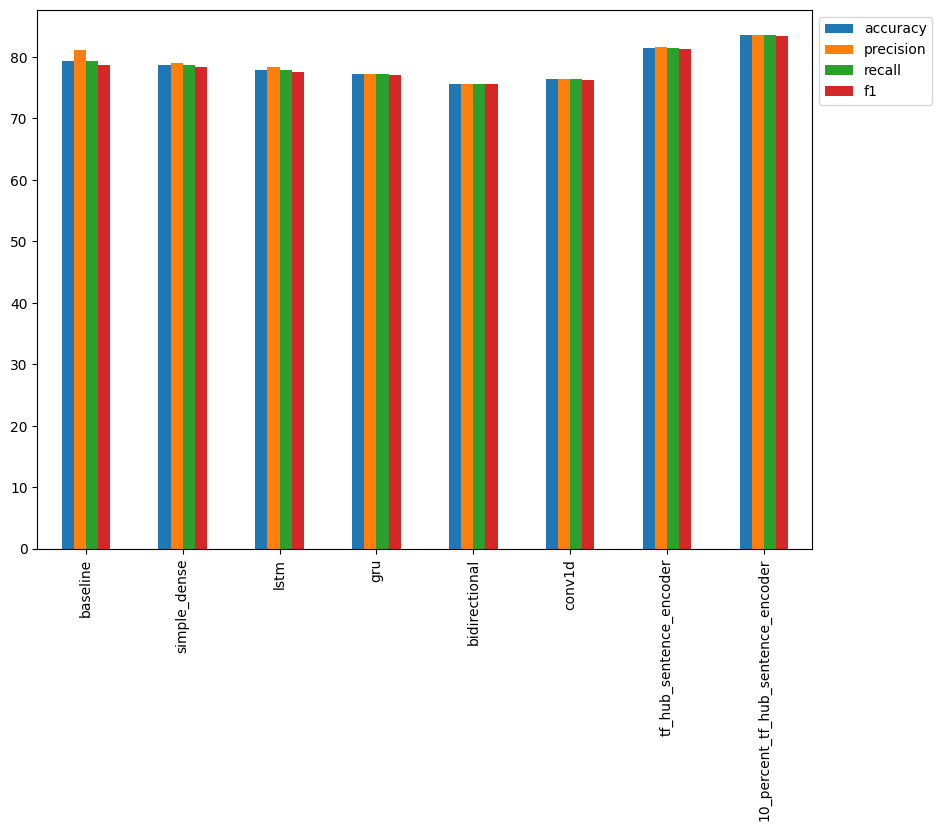

In [103]:
all_model_results.plot(kind="bar", figsize=(10, 7)).legend(bbox_to_anchor=(1.0, 1.0))

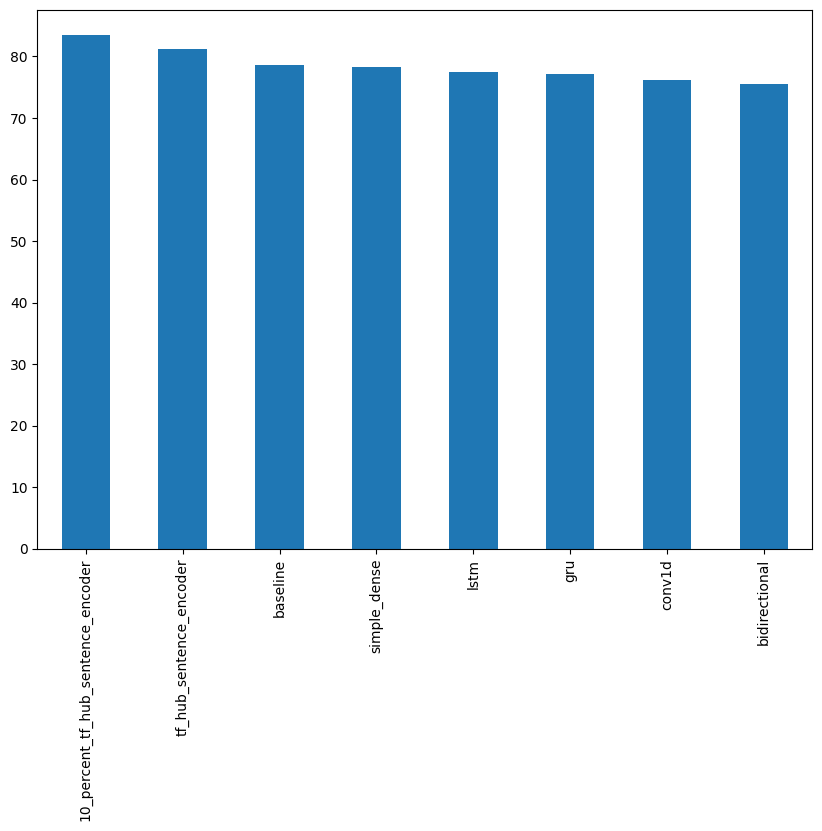

In [104]:
# Sort model results by f1-score
all_model_results.sort_values("f1", ascending=False)["f1"].plot(kind="bar", figsize=(10, 7));

# uploading the model to Tensor board

In [116]:
# view tensorboard logs of all the model we have done before
!tensorboard dev upload --logdir ./model_logs/ \
  --name 'NLP modelling Performance' \
  --description 'Comparing the performanec of all the NLP model on tweeter data for disaster' \
  --one_shot #exit the uploader once uploading is finished'

2023-12-26 09:02:33.860819: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-26 09:02:33.860896: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-26 09:02:33.862650: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-26 09:02:35.464041: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
****************************************************************
****************************************************************
****************************************************************

Uploading TensorBoard logs to https://tensorb

#we want to export the best meofl so that some other can use it

In [117]:
#there are two main formats to save a model in tensor flow

model_7.save("model_6.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


#Finding the most wrong
if our best mdoel still isnt perfect waht example it is predicting the most worng that we have to find out


We mentioned before that if many of our modelling experiments are returning similar results, despite using different kinds of models, it's a good idea to return to the data and inspect why this might be.

One of the best ways to inspect your data is to sort your model's predictions and find the samples it got most wrong, meaning, what predictions had a high prediction probability but turned out to be wrong.

In [118]:
# Create dataframe with validation sentences and best performing model predictions
val_df = pd.DataFrame({"text": val_sentences,
                       "target": val_labels,
                       "pred": model_6_preds,
                       "pred_prob": tf.squeeze(model_6_pred_probs)})
val_df.head()

,text,target,pred,pred_prob
0,DFR EP016 Monthly Meltdown - On Dnbheaven 2015...,0,0.0,0.154879
1,FedEx no longer to transport bioterror germs i...,0,1.0,0.741273
2,Gunmen kill four in El Salvador bus attack: Su...,1,1.0,0.988123
3,@camilacabello97 Internally and externally scr...,1,0.0,0.204202
4,Radiation emergency #preparedness starts with ...,1,1.0,0.735611


In [119]:
# Find the wrong predictions and sort by prediction probabilities
most_wrong = val_df[val_df["target"] != val_df["pred"]].sort_values("pred_prob", ascending=False)
most_wrong[:10]

,text,target,pred,pred_prob
31,? High Skies - Burning Buildings ? http://t.co...,0,1.0,0.917466
759,FedEx will no longer transport bioterror patho...,0,1.0,0.862347
628,@noah_anyname That's where the concentration c...,0,1.0,0.853009
393,@SonofLiberty357 all illuminated by the bright...,0,1.0,0.849069
49,@madonnamking RSPCA site multiple 7 story high...,0,1.0,0.838951
209,Ashes 2015: AustraliaÛªs collapse at Trent Br...,0,1.0,0.807600
251,@AshGhebranious civil rights continued in the ...,0,1.0,0.806045
109,[55436] 1950 LIONEL TRAINS SMOKE LOCOMOTIVES W...,0,1.0,0.794951
698,åÈMGN-AFRICAå¨ pin:263789F4 åÈ Correction: Ten...,0,1.0,0.790165
144,The Sound of Arson,0,1.0,0.786484


We can view the bottom end of our most_wrong DataFrame to inspect false negatives (model predicts 0, not a real diaster Tweet, when it should've predicted 1, real diaster Tweet).

In [120]:
# Check the most wrong false negatives (model predicted 0 when should've predict 1)
for row in most_wrong[-10:].itertuples():
  _, text, target, pred, prob = row
  print(f"Target: {target}, Pred: {int(pred)}, Prob: {prob}")
  print(f"Text:\n{text}\n")
  print("----\n")

Target: 1, Pred: 0, Prob: 0.05972648039460182
Text:
going to redo my nails and watch behind the scenes of desolation of smaug ayyy

----

Target: 1, Pred: 0, Prob: 0.059616003185510635
Text:
Next May I'll be free...from school from obligations like family.... Best of all that damn curfew...

----

Target: 1, Pred: 0, Prob: 0.057300254702568054
Text:
Lucas Duda is Ghost Rider. Not the Nic Cage version but an actual 'engulfed in flames' badass. #Mets

----

Target: 1, Pred: 0, Prob: 0.055440753698349
Text:
You can never escape me. Bullets don't harm me. Nothing harms me. But I know pain. I know pain. Sometimes I share it. With someone like you.

----

Target: 1, Pred: 0, Prob: 0.0551513247191906
Text:
@willienelson We need help! Horses will die!Please RT &amp; sign petition!Take a stand &amp; be a voice for them! #gilbert23 https://t.co/e8dl1lNCVu

----

Target: 1, Pred: 0, Prob: 0.043891169130802155
Text:
I get to smoke my shit in peace

----

Target: 1, Pred: 0, Prob: 0.042130243033170

so from the above examples we can see that the labels it self is wrong and prediction is correct so we have to go and change the lable its elf . NOTE: look at the text


so there are laels which are incorrect in our dataset


In [121]:
# Making predictions on the test dataset
test_sentences = test_df["text"].to_list()
test_samples = random.sample(test_sentences, 10)
for test_sample in test_samples:
  pred_prob = tf.squeeze(model_6.predict([test_sample])) # has to be list
  pred = tf.round(pred_prob)
  print(f"Pred: {int(pred)}, Prob: {pred_prob}")
  print(f"Text:\n{test_sample}\n")
  print("----\n")

1/1 [==============================] - 0s 77ms/step
Pred: 1, Prob: 0.989087700843811
Text:
Hundreds of commuters abandoned at LRT station during severe hailstorm http://t.co/25wIeHMLZ5

----

1/1 [==============================] - 0s 42ms/step
Pred: 0, Prob: 0.4070577323436737
Text:
Lightning express golf trolleys fix ramify pretty much multitudinal areas on thine disposed: kWXGgt

----

1/1 [==============================] - 0s 35ms/step
Pred: 0, Prob: 0.1654411405324936
Text:
This Davies is why you don't play FM tired. Obliterated my budget http://t.co/CZ65rUoGXB

----

1/1 [==============================] - 0s 35ms/step
Pred: 1, Prob: 0.9498216509819031
Text:
South Side factory where worker electrocuted pays $17000 penalty http://t.co/PENJHc4ZCx #Columbus #Ohio #news

----

1/1 [==============================] - 0s 35ms/step
Pred: 1, Prob: 0.8818653225898743
Text:
New warning for Central Hills 1' hail 60 mph winds. NOT affecting Sturgis but could later tonight. #KOTAWeather http://t

Predicting form different tweet


In [122]:
def predict_on_sentence(model, sentence):
  """
  Uses model to make a prediction on sentence.

  Returns the sentence, the predicted label and the prediction probability.
  """
  pred_prob = model.predict([sentence])
  pred_label = tf.squeeze(tf.round(pred_prob)).numpy()
  print(f"Pred: {pred_label}", "(real disaster)" if pred_label > 0 else "(not real disaster)", f"Prob: {pred_prob[0][0]}")
  print(f"Text:\n{sentence}")

In [123]:
famous_tweets ="Despite the constant negative press covfefe,"

In [125]:
# Make a prediction on Tweet from the wild
predict_on_sentence(model=model_6, # use the USE model
                    sentence=famous_tweets)

1/1 [==============================] - 0s 35ms/step
Pred: 0.0 (not real disaster) Prob: 0.09945804625749588
Text:
Despite the constant negative press covfefe,


THE speed / score trade off
Put it this way, imagine you're Twitter and receive 1 million Tweets per hour (this is a made up number, the actual number is much higher). And you're trying to build a diaster detection system to read Tweets and alert authorities with details about a diaster in close to real-time.

Compute power isn't free so you're limited to a single compute machine for the project. On that machine, one of your models makes 10,000 predictions per second at 80% accuracy where as another one of your models (a larger model) makes 100 predictions per second at 85% accuracy.

In [126]:
# Calculate the time of predictions
import time
def pred_timer(model, samples):
  """
  Times how long a model takes to make predictions on samples.

  Args:
  ----
  model = a trained model
  sample = a list of samples

  Returns:
  ----
  total_time = total elapsed time for model to make predictions on samples
  time_per_pred = time in seconds per single sample
  """
  start_time = time.perf_counter() # get start time
  model.predict(samples) # make predictions
  end_time = time.perf_counter() # get finish time
  total_time = end_time-start_time # calculate how long predictions took to make
  time_per_pred = total_time/len(val_sentences) # find prediction time per sample
  return total_time, time_per_pred

In [127]:
# Calculate TF Hub Sentence Encoder prediction times
model_6_total_pred_time, model_6_time_per_pred = pred_timer(model_6, val_sentences)
model_6_total_pred_time, model_6_time_per_pred

24/24 [==============================] - 0s 10ms/step


(0.30722178899941355, 0.00040317820078663197)

#Bert Model



In [105]:
!pip install transformers

In [106]:
from transformers import BertTokenizer, TFBertModel
from tensorflow.keras import layers

In [107]:
train_labels

array([0, 0, 1, ..., 1, 1, 0])

In [108]:
train_sentences=list(train_sentences)

In [109]:
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
tokenized_train = tokenizer(train_sentences, truncation=True, padding=True, return_tensors="tf")
train_input_ids = tokenized_train["input_ids"]
train_attention_mask = tokenized_train["attention_mask"]

tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [110]:
bert_model = TFBertModel.from_pretrained("bert-base-uncased")

class BertLayer(tf.keras.layers.Layer):
    def __init__(self, bert_model, trainable=False, **kwargs):
        super(BertLayer, self).__init__(**kwargs)
        self.bert_model = bert_model
        self.embedding = layers.Bidirectional(layers.LSTM(64, return_sequences=True, recurrent_initializer='glorot_uniform'))

    def call(self, inputs):
        input_ids, attention_mask = inputs
        outputs = self.bert_model(input_ids, attention_mask=attention_mask)
        return self.embedding(outputs['last_hidden_state'])

# Input layers
input_ids = tf.keras.layers.Input(shape=(None,), dtype=tf.int32, name="input_ids")
attention_mask = tf.keras.layers.Input(shape=(None,), dtype=tf.int32, name="attention_mask")

# BERT layer
bert_layer = BertLayer(bert_model, trainable=False)([input_ids, attention_mask])

# Intermediate layers
dense_layer = layers.Dense(64, activation="relu")(bert_layer)
output_layer = layers.Dense(1, activation="sigmoid")(dense_layer)

# Model definition using the functional API
model = tf.keras.Model(inputs=[input_ids, attention_mask], outputs=output_layer, name="disaster_tweet_classifier")

model.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [111]:
# Ensure that labels are properly shaped
train_labels = train_labels.reshape(-1, 1)

In [112]:
model.fit([train_input_ids, train_attention_mask], train_labels, epochs=5, validation_split=0.2)


Epoch 1/5


172/172 [==============================] - 171s 663ms/step - loss: 0.6934 - accuracy: 0.5630 - val_loss: 0.6766 - val_accuracy: 0.5908
Epoch 2/5
172/172 [==============================] - 108s 628ms/step - loss: 0.6853 - accuracy: 0.5690 - val_loss: 0.6786 - val_accuracy: 0.5908
Epoch 3/5
172/172 [==============================] - 108s 627ms/step - loss: 0.6846 - accuracy: 0.5690 - val_loss: 0.6832 - val_accuracy: 0.5908
Epoch 4/5
172/172 [==============================] - 109s 631ms/step - loss: 0.6843 - accuracy: 0.5690 - val_loss: 0.6831 - val_accuracy: 0.5908
Epoch 5/5
172/172 [==============================] - 108s 628ms/step - loss: 0.6846 - accuracy: 0.5690 - val_loss: 0.6776 - val_accuracy: 0.5908


In [113]:
from transformers import BertTokenizer, TFBertForSequenceClassification
from sklearn.metrics import classification_report
# Load pre-trained BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased')

# Tokenize and encode the training data
train_encodings = tokenizer(list(train_sentences),
                             truncation=True,
                             padding=True,
                             max_length=128,
                             return_tensors='tf')

# Tokenize and encode the validation data
val_encodings = tokenizer(list(val_sentences),
                           truncation=True,
                           padding=True,
                           max_length=128,
                           return_tensors='tf')

# Convert labels to TensorFlow tensors
train_labels = tf.convert_to_tensor(train_labels)
val_labels = tf.convert_to_tensor(val_labels)

# Create TensorFlow Dataset
train_dataset = tf.data.Dataset.from_tensor_slices((
    dict(train_encodings),
    train_labels
))

val_dataset = tf.data.Dataset.from_tensor_slices((
    dict(val_encodings),
    val_labels
))

# Fine-tune BERT model on the disaster tweets dataset
optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')

model.compile(optimizer=optimizer, loss=loss, metrics=[metric])

# Train the model
history = model.fit(
    train_dataset.shuffle(1000).batch(16),
    epochs=3,
    batch_size=16,
    validation_data=val_dataset.batch(16)
)

# Evaluate the model
val_predictions = model.predict(val_dataset.batch(16))
val_predictions = tf.argmax(tf.nn.softmax(val_predictions.logits), axis=1)

print(classification_report(val_labels, val_predictions))


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/3
429/429 [==============================] - 178s 314ms/step - loss: 0.4481 - accuracy: 0.8053 - val_loss: 0.3908 - val_accuracy: 0.8268
Epoch 2/3
429/429 [==============================] - 131s 305ms/step - loss: 0.3322 - accuracy: 0.8711 - val_loss: 0.4472 - val_accuracy: 0.8228
Epoch 3/3
48/48 [==============================] - 8s 106ms/step
              precision    recall  f1-score   support

           0       0.84      0.83      0.84       414
           1       0.80      0.81      0.81       348

    accuracy                           0.82       762
   macro avg       0.82      0.82      0.82       762
weighted avg       0.82      0.82      0.82       762

